<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Генерация-случайной-обратимой-матрицы" data-toc-modified-id="Генерация-случайной-обратимой-матрицы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Генерация случайной обратимой матрицы</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Преобразование данных</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-и-оценка-качества" data-toc-modified-id="Обучение-модели-и-оценка-качества-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели и оценка качества</a></span></li><li><span><a href="#Вычисление-метрики-R2-на-исходных-данных-и-преобразованных-данных" data-toc-modified-id="Вычисление-метрики-R2-на-исходных-данных-и-преобразованных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вычисление метрики R2 на исходных данных и преобразованных данных</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [2]:
#df = pd.read_csv('insurance.csv')
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


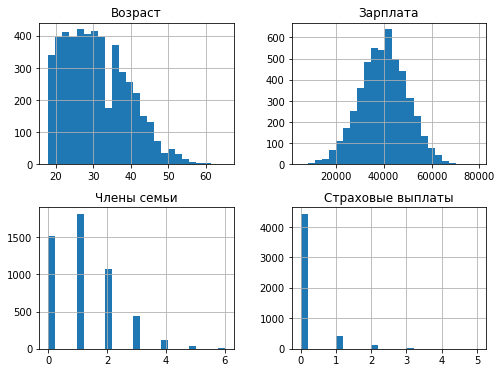

In [7]:
df.iloc[:,1:].hist(figsize=(8, 6), bins=25);

In [8]:
df.duplicated().sum()

153

Уберем дубликаты


In [9]:
df = df.drop_duplicates()

Данные впорядке, выглядят гармонично. Они представляют собой датафрейм размером 5000х5, без аномалий и выбросов.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Метрика не ухудшается

**Обоснование:** 
Пусть
$$
X' = XP 
$$
Если 
$$
w = (X^T X)^{-1} X^T y 
$$
То
$$
w' = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y =  P^{-1} (X^T X)^{-1}X^T y
$$

$$
w' =  P^{-1} w
$$
Следовательно
$$
a' = X'w' = XPw' = XP P^{-1} w = Xw = a
$$
**Качество линейной регрессии не зависит от матрицы $P$, если она обратима**

## Алгоритм преобразования

**Алгоритм**

Преобразуем умножением исходной матрицы признаков на случайную обратимую матрицу

### Загрузка и предобработка данных

In [10]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

In [11]:
# Преобразование матриц в массив NumPy
X = features.values
y = target.values

### Генерация случайной обратимой матрицы

In [12]:
P = np.random.randint(100, size=(X.shape[1], X.shape[1]))

# Проводим проверку обратимости матрицы P
while np.linalg.det(P) == 0:
    P = np.random.randint(100, size=(X.shape[1], X.shape[1]))


### Преобразование данных

In [13]:
X_transformed = X.dot(P)
X_transformed_ones = np.concatenate((np.ones((X_transformed.shape[0], 1)), X_transformed), axis=1)

## Проверка алгоритма

### Обучение модели и оценка качества

In [14]:
# Создание и обучение модели линейной регрессии на исходных данных
model_original = LinearRegression()
model_original.fit(X, y)

# Создание и обучение модели линейной регрессии на преобразованных данных
model_transformed = LinearRegression()
model_transformed.fit(X_transformed, y)

y_pred_original = model_original.predict(X)
y_pred_transformed = model_transformed.predict(X_transformed)

Если наши гипотеза верна, то разница между предсказаниями будет нулевая (или почти нулевая)

### Вычисление метрики R2 на исходных данных и преобразованных данных

In [15]:
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y, y_pred_transformed)

print('R2 score (original):', r2_original)
print('R2 score (transformed):', r2_transformed)

R2 score (original): 0.4302010044852066
R2 score (transformed): 0.4302010044852105


**Вывод**

Как мы видим, метрика r2 не изменилась, соответственно, наш алгоритм преобразования работает и не ухудшается качество модели.